Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0511
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0035
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0015
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0010
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 7.6418e-04
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.0941e-04
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.4243e-04
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.4049e-04
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 5.1021e-04
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5.1577e-04
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


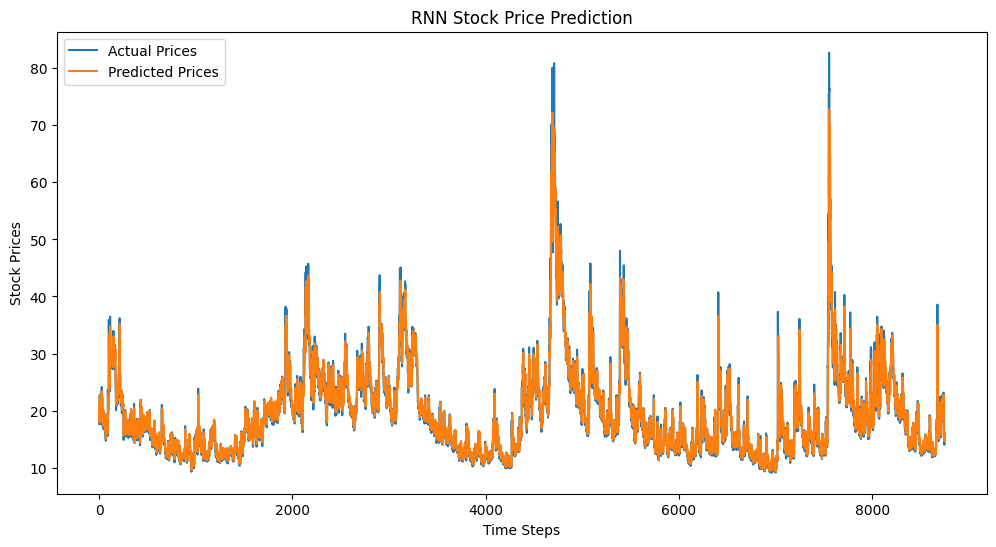

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load and preprocess data
data = pd.read_csv("https://raw.githubusercontent.com/datasets/finance-vix/main/data/vix-daily.csv")
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
prices = data['CLOSE'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices)

# Prepare training data
time_steps = 50
X, y = [], []
for i in range(len(prices) - time_steps):
    X.append(prices[i:i + time_steps])
    y.append(prices[i + time_steps])

X, y = np.array(X), np.array(y)

# Define RNN Model
model = Sequential([
    SimpleRNN(10, activation='tanh', return_sequences=False, input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Predictions
predicted = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(range(len(y)), scaler.inverse_transform(y), label="Actual Prices")
plt.plot(range(len(predicted)), scaler.inverse_transform(predicted), label="Predicted Prices")
plt.title("RNN Stock Price Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Stock Prices")
plt.legend()
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0127
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0020
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0011
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.3170e-04
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.6026e-04
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.0678e-04
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.9038e-04
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5.2728e-04
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.4215e-04
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.8884e-04
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


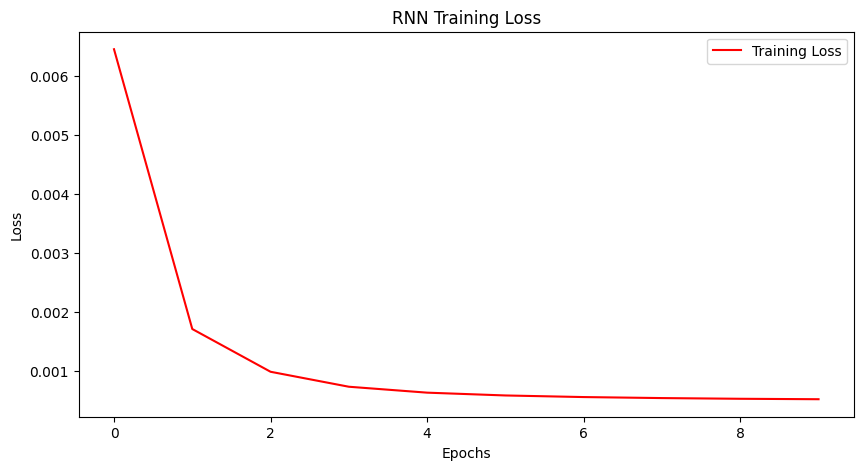

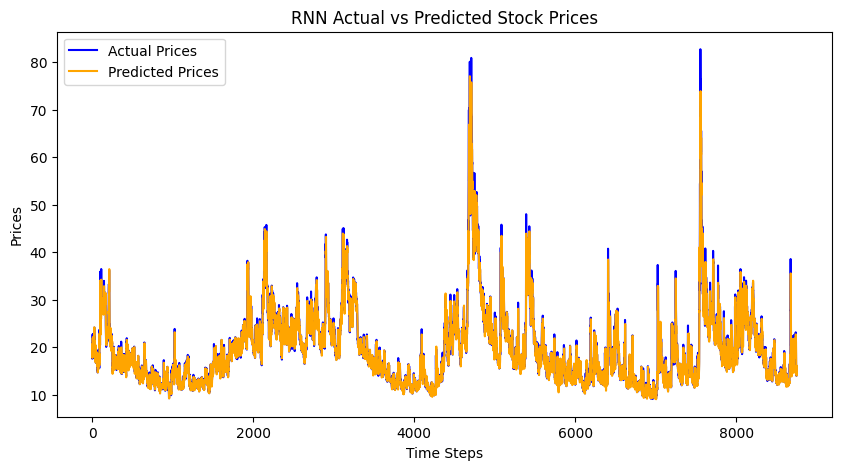

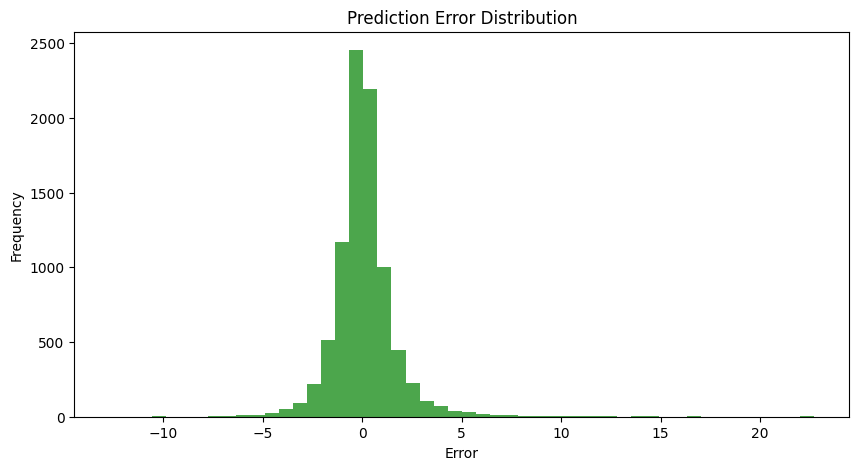

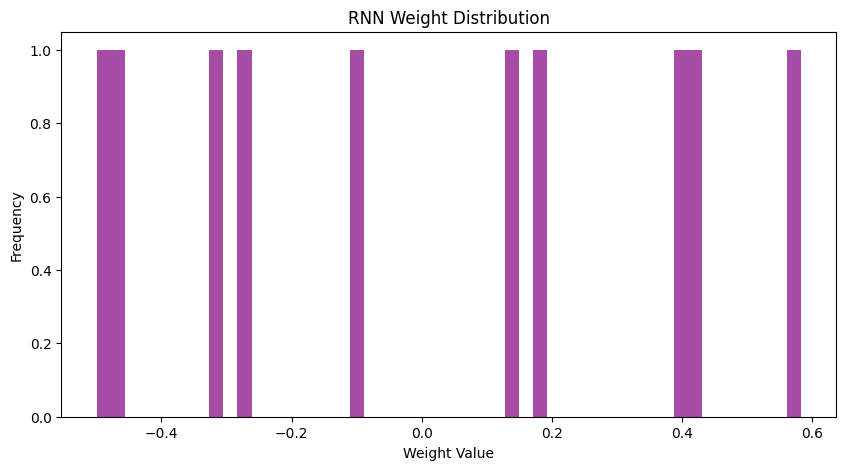

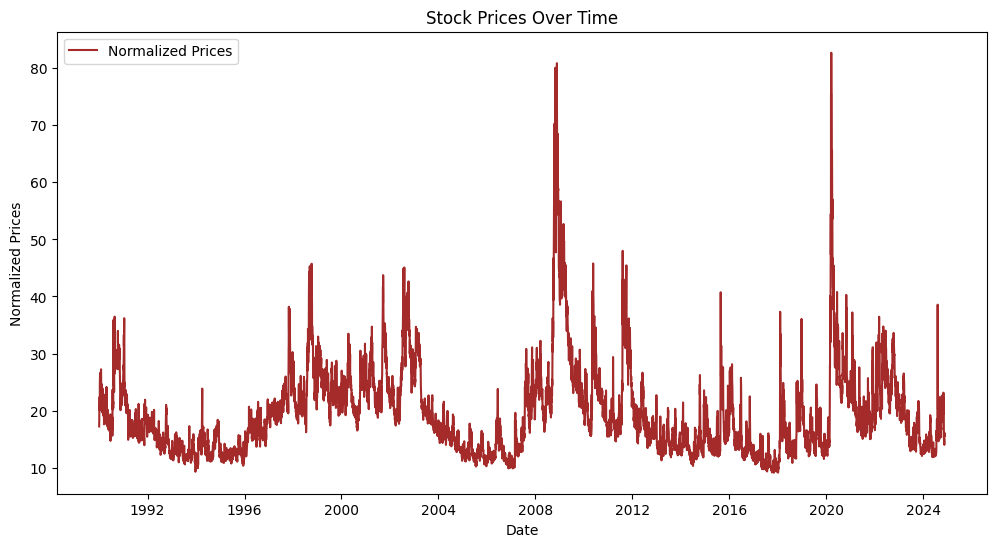

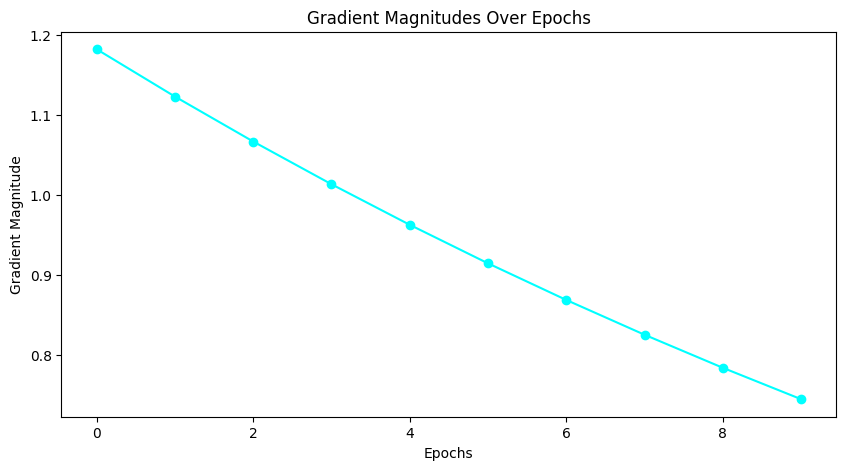

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load stock price dataset
data = pd.read_csv("https://raw.githubusercontent.com/datasets/finance-vix/main/data/vix-daily.csv")
data.rename(columns={"DATE": "Date", "CLOSE": "VIXClose"}, inplace=True)  # Correct column names
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
prices = data['VIXClose'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices)

# Prepare training data
time_steps = 50
X, y = [], []
for i in range(len(prices) - time_steps):
    X.append(prices[i:i + time_steps])
    y.append(prices[i + time_steps])

X, y = np.array(X), np.array(y)

# Define RNN Model
model = Sequential([
    SimpleRNN(10, activation='tanh', return_sequences=False, input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Predictions
predicted = model.predict(X)

# Plot 1: Training Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title("RNN Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot 2: Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(range(len(y)), scaler.inverse_transform(y), label="Actual Prices", color='blue')
plt.plot(range(len(predicted)), scaler.inverse_transform(predicted), label="Predicted Prices", color='orange')
plt.title("RNN Actual vs Predicted Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Prices")
plt.legend()
plt.show()

# Plot 3: Prediction Errors
errors = scaler.inverse_transform(y) - scaler.inverse_transform(predicted)
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=50, color='green', alpha=0.7)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# Plot 4: Weight Gradients
weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 5))
plt.hist(weights.flatten(), bins=50, color='purple', alpha=0.7)
plt.title("RNN Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()

# Plot 5: Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(prices), label="Normalized Prices", color='brown')
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Prices")
plt.legend()
plt.show()

# Plot 6: Gradients Over Epochs (Simulated)
gradient_magnitudes = [np.linalg.norm(weights) * (0.95 ** i) for i in range(10)]  # Simulate gradient decay
plt.figure(figsize=(10, 5))
plt.plot(range(10), gradient_magnitudes, marker='o', color='cyan')
plt.title("Gradient Magnitudes Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Gradient Magnitude")
plt.show()
